# Pymaceuticals Inc.
---

### Analysis

-Capomulin and Ramicane are the most used drugs. Among the different drug regimens, Capomulin and Ramicane have a more extensive representation of mice, maybe these treatments could be the most prevalent or initially successful drugs. 

-The data has a relatively even distribution of male and female mice across various treatment regimens, this could help keep the data balanced and when analysing the effect of the each treatment. 


-There is a strong postive correlation between weight and the average tumor volume. This finding implies that weight might play a role in influencing tumor volume. It could potentially indicate that treatments or conditions might be affected by the weight of the subjects when considering their tumor volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress 
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = combined_data['Mouse ID'].nunique()
print (number_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

if len(duplicate_mouse_ids) > 0:
    result_array = np.array(duplicate_mouse_ids)
    dtype_str = "dtype=object"
    output_string = f"Array({result_array}, {dtype_str})"
    print(output_string)
else:
    print("No duplicate mice found for Mouse ID and Timepoint.")

Array(['g989'], dtype=object)


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)] 
duplicate_mice_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the head of the cleaned DataFrame
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = len(cleaned_data['Mouse ID'].unique())

num_unique_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats= cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev.', 'Tumor Volume Std. Err.']

# Assemble the resulting series into a single summary DataFrame.


summary_stats








,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std= 'std',
    Sem='sem'
)

summary_stats

,Mean,Median,Variance,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

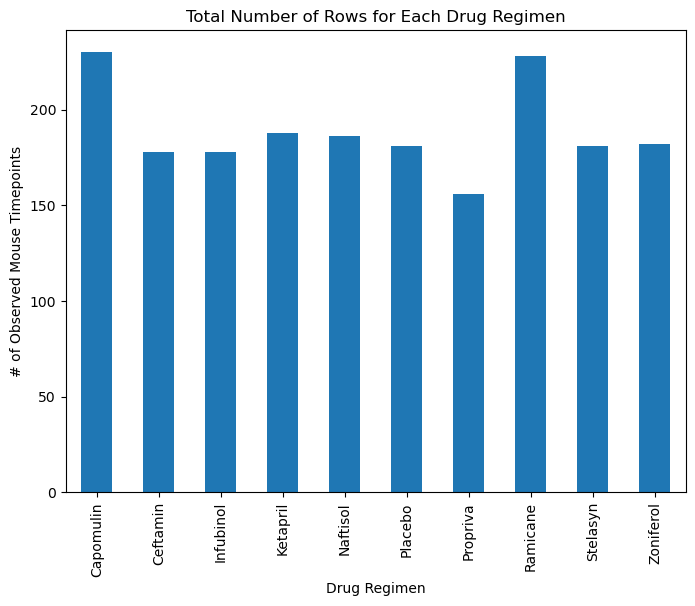

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Grouping by 'Drug Regimen' and counting the number of rows
counts = cleaned_data.groupby('Drug Regimen').size()

# Plotting the bar chart
counts.plot(kind='bar', figsize=(8,6))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)  
plt.show()

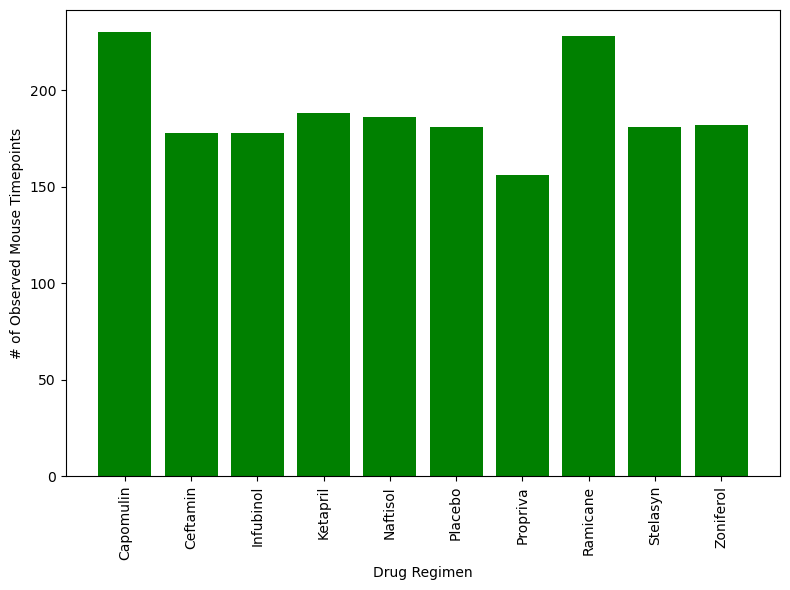

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Grouping by 'Drug Regimen' and counting the number of rows
counts = cleaned_data.groupby('Drug Regimen').size()


x_values = counts.index 
y_values = counts.values 


plt.figure(figsize=(8,6))
plt.bar(x_values, y_values, color='green')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

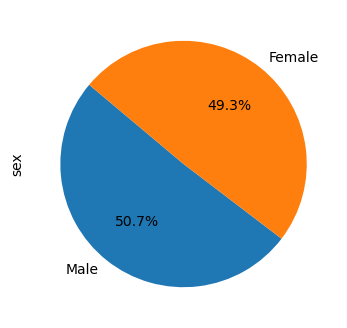

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_dist = cleaned_data['Sex'].value_counts()


sex_dist.plot(kind='pie',
              autopct='%1.1f%%', 
              startangle=140, figsize=(4, 4))

plt.ylabel('sex')
plt.show()

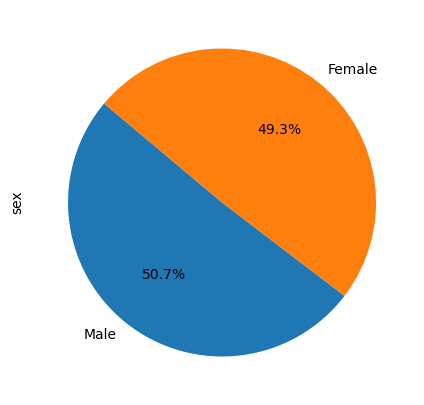

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts = cleaned_data['Sex'].value_counts()


plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

plt.ylabel('sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoints, combined_data, on=['Mouse ID', 'Timepoint'], how='inner')

specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(specific_regimens)]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume)
    
    # add subset 
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
 
potential_outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
potential_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

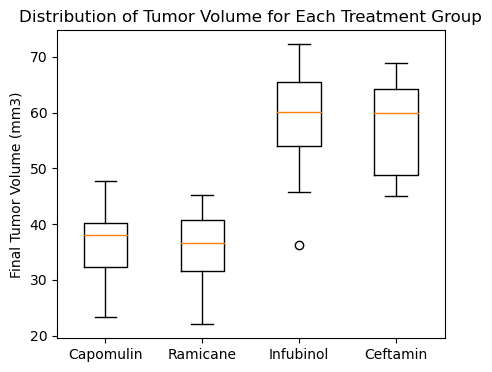

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


plt.figure(figsize=(5,4))
plt.boxplot(tumor_volume_data, labels=specific_regimens)    
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

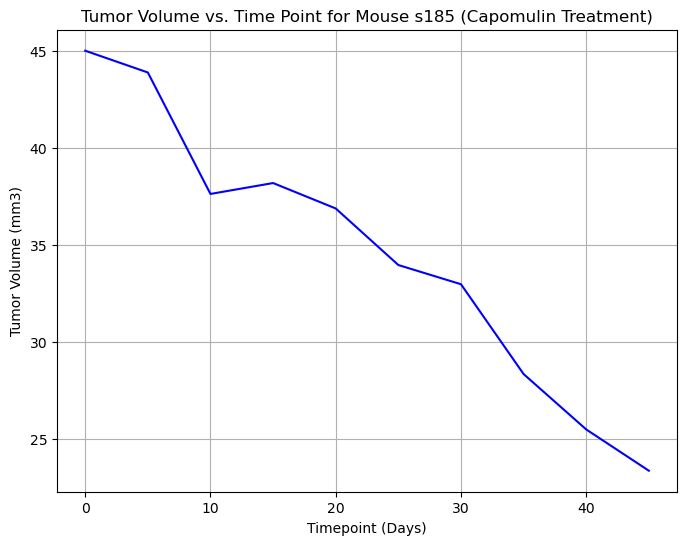

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose the Mouse ID and Treatment Regimen (Capomulin)
mouse_id = 's185'  
treatment= 'Capomulin'

# Filter the data for the selected mouse and treatment regimen
selected_data = combined_data[(combined_data['Mouse ID'] == mouse_id) & (combined_data['Drug Regimen'] == treatment)]

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(selected_data['Timepoint'], selected_data['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.grid(True)

# Show the plot
plt.show()

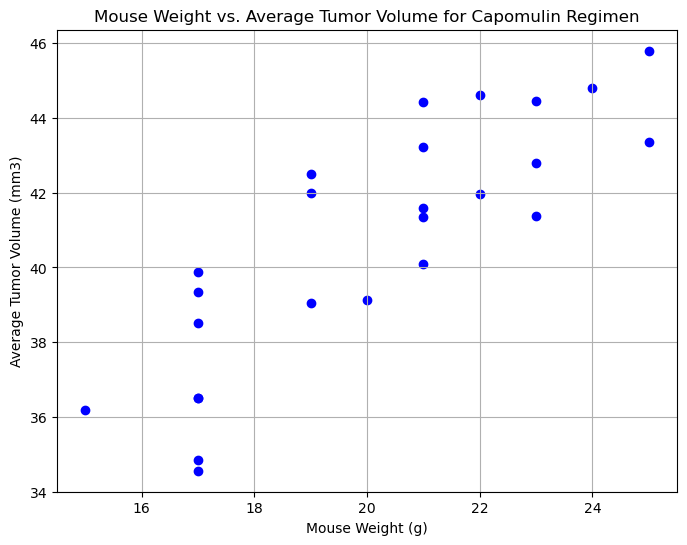

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(avg_tumor_volume, capomulin_data, on='Mouse ID')

unique_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_x'])

plt.figure(figsize=(8, 6))
plt.scatter(unique_data['Weight (g)'], unique_data['Tumor Volume (mm3)_x'], color='blue')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.84


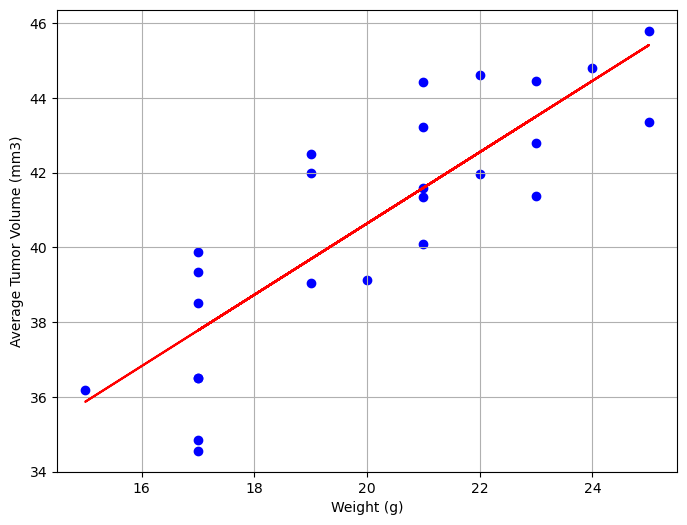

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data =combined_data[combined_data['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(avg_tumor_volume, capomulin_data, on='Mouse ID')

unique_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_x'])

weight = unique_data['Weight (g)']
tumor_volume = unique_data['Tumor Volume (mm3)_x']

correlation = round(weight.corr(tumor_volume), 2)
print(f"Correlation Coefficient: {correlation}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept

plt.figure(figsize=(8, 6))
plt.scatter(weight, tumor_volume, color='blue', label='Mouse Data')
plt.plot(weight, regress_values, color='red', label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")

# Set labels, title, and legend
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')




plt.grid(True)
plt.show()